# Previously on Módulo 01

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore') #ignora os avisos
pd.options.display.float_format = "{:,.2f}".format #ajusta o formato numérico exibido

## Aquisição e tratamento dos dados

In [3]:
df = pd.read_csv("/content/A184117189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")


In [4]:
colunas_usaveis = df.mean().index.tolist()

In [5]:
lista_regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
lista_regioes

['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

In [6]:
coluna_regioes = []
for i in range(0,df.shape[0]):
  dig = int(df['Unidade da Federação'][i][0])
  coluna_regioes.append(lista_regioes[dig-1])
df['Região'] = coluna_regioes

df['Unidade da Federação'] = df['Unidade da Federação'].str.slice(3,)
df = df.set_index('Unidade da Federação')
df

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68",Norte
Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47",Norte
Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,351,607.47","16,339,427.95","14,821,977.50","14,965,815.90","15,982,353.42","15,166,470.82","14,815,958.58","16,379,386.07","19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80","1,917,247,936.05",Norte
Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,306,119.95","2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31","328,876,965.09",Norte
Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,008,924.95","31,064,106.50","28,543,179.30","36,713,929.36","36,462,011.47","36,

In [7]:


dados_usaveis = df[['Região'] + colunas_usaveis]





In [8]:
dados_usaveis

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,Norte,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,829,559.71","1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58","2,624,542.97","2,973,421.02","2,938,286.29","2,843,930.91","2,878,153.20","2,780,022.62","2,651,804.89","3,147,566.24","3,082,108.12","4,190,355.33","4,040,251.62","3,946,423.71","3,372,377.96","3,720,608.86","3,787,323.26","3,679,369.94","3,866,146.99","3,667,808.60","3,633,471.79","3,812,315.59","3,911,776.03","4,663,060.75","4,524,544.88","4,778,755.26","4,369,733.23","4,632,439.12","4,464,307.47","4,668,642.02","4,490,368.23",...,"8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,327,665.97","8,431,334.62","7,251,287.20","7,490,440.60","8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68"
Acre,Norte,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29",...,"2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47"
Amazonas,Norte,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49","9,996,686.44",...,"14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15

# Aula 01: Fontes externas, limpeza e manipulação

Como extrair dados popopulacionais contidos na primeira tabela desta [página da Wikipedia]('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o)? Uma maneira de fazer é copiar e colar diretamente no código (utilizando três aspas duplas):

In [9]:
dados_populacao = """
Posição	Unidade federativa	População	% da pop. total	País comparável
1	 São Paulo	46 289 333	21,9%	 Espanha (46 439 864)
2	 MG Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

E utilizamos o código:

In [10]:
from io import StringIO
pop_io = StringIO(dados_populacao)

pop_wiki = pd.read_csv(pop_io, sep = '\t')
pop_wiki

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,MG Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


Vamos limpar um pouco essa tabela:

In [11]:
pop_wiki.columns = ['posicao', 'uf', 'populacao', '% pop total', 'pais comparavel']
pop_wiki.drop(['posicao', 'pais comparavel'], axis = 1, inplace=
              True)
pop_wiki = pop_wiki.set_index('uf')
pop_wiki.replace(' ','', inplace=True, regex=True)
pop_wiki.replace('%','', inplace=True, regex=True)
pop_wiki.replace(',','.', inplace=True, regex=True)

pop_wiki['populacao'] = pop_wiki['populacao'].astype(int)
pop_wiki['% pop total'] = pop_wiki['% pop total'].astype(float)

pop_wiki

,populacao,% pop total
uf,,
São Paulo,46289333,21.90
MG Minas Gerais,21292666,10.10
Rio de Janeiro,17366189,8.20
Bahia Bahia,14930634,7.10
Paraná,11516840,5.40
Rio Grande do Sul,11422973,5.40
Pernambuco,9616621,4.50
Ceará,9187103,4.30
Pará Pará,8690745,4.10


Uma segunda maneira de obter essa mesma tabela é utilizar o read_html em vez do read_csv do pandas:

In [12]:
pop_wiki2 = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')

In [13]:
pop_wiki2

[    Posição  ...        País comparável (habitantes)
 0         1  ...                Espanha (46 439 864)
 1         2  ...              Sri Lanka (20 675 000)
 2         3  ...          Países Baixos (16 922 900)
 3         4  ...                  Chade (14 037 000)
 4         5  ...                Bolívia (11 410 651)
 5         6  ...                Bélgica (11 250 659)
 6         7  ...            Bielorrússia (9 485 300)
 7         8  ...  Emirados Árabes Unidos (9 157 000)
 8         9  ...                 Áustria (8 602 112)
 9        10  ...                  Sérvia (7 114 393)
 10       11  ...                Paraguai (7 003 406)
 11       12  ...                Paraguai (7 003 406)
 12       13  ...                  Líbano (4 168 000)
 13       14  ...                  Líbano (4 168 000)
 14       15  ...                  Líbano (4 168 000)
 15       16  ...                 Uruguai (3 415 866)
 16       17  ...                 Uruguai (3 415 866)
 17       18  ...           

Observe que esse comando nos dá não uma tabela, mas a lista de todas as tabelas contidas no endereço html passado. Já que é uma lista, podemos selecionar o elemento que desejarmos, bastando passar o índice (posição) dele na lista:

In [14]:
pop_wiki2 = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')[0]

In [15]:
pop_wiki2

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


Não foi necessário nesse caso, mas se quiséssemos, poderíamos ainda ter passado o comando match = (algum elemento que ajude a identificar a tabela). Assim o read_html iria retormar apenas as tabelas com aquele elemento. Vejamos:

In [16]:
pop_wiki2 = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o', match= 'População')[0]

In [17]:
pop_wiki2

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


Uma terceira maneira de obter a mesma tabela seria com o auxilio da biblioteca Beaultiful Soup. Para isso, precisamos importar novas bibliotecas:

In [18]:
from bs4 import BeautifulSoup
import requests

O comando nos retorna uma cópia do endereço html passado:

In [19]:
page = requests.get('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o').content

Podemos agora criar nosso web scarper. É preciso passar o tipo de parse que ele utilizará. Temos opções como: html.parser, lxml e html5lib. Usaremos o primeiro.

In [20]:
soup = BeautifulSoup(page, 'html.parser')

O próximo comando nos retorna o primeiro elemento 'table' encontrado na page:

In [21]:
tabela_html = soup.find_all('table')[0]
tabela_html

<table class="wikitable sortable" style="text-align:center">
<tbody><tr>
<th>Posição
</th>
<th>Unidade federativa
</th>
<th>População
</th>
<th>% da pop. total
</th>
<th>País comparável
<p>(habitantes)
</p>
</th></tr>
<tr>
<td>1
</td>
<td align="left"><img alt="" class="thumbborder" data-file-height="520" data-file-width="780" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Bandeira_do_estado_de_S%C3%A3o_Paulo.svg/22px-Bandeira_do_estado_de_S%C3%A3o_Paulo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Bandeira_do_estado_de_S%C3%A3o_Paulo.svg/33px-Bandeira_do_estado_de_S%C3%A3o_Paulo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Bandeira_do_estado_de_S%C3%A3o_Paulo.svg/44px-Bandeira_do_estado_de_S%C3%A3o_Paulo.svg.png 2x" width="22"> <a href="/wiki/S%C3%A3o_Paulo_(estado)" title="São Paulo (estado)">São Paulo</a>
</img></td>
<td align="right">46 289 333
</td>
<td>21,9%
</td>
<td><img alt="Flag of Spain.svg" 

Agora o pandas pode ler esse elemento e criar um dataframe a partir dele:

In [22]:
tabelas = pd.read_html(str(tabela_html))


In [23]:
tabelas

[    Posição  ...        País comparável (habitantes)
 0         1  ...                Espanha (46 439 864)
 1         2  ...              Sri Lanka (20 675 000)
 2         3  ...          Países Baixos (16 922 900)
 3         4  ...                  Chade (14 037 000)
 4         5  ...                Bolívia (11 410 651)
 5         6  ...                Bélgica (11 250 659)
 6         7  ...            Bielorrússia (9 485 300)
 7         8  ...  Emirados Árabes Unidos (9 157 000)
 8         9  ...                 Áustria (8 602 112)
 9        10  ...                  Sérvia (7 114 393)
 10       11  ...                Paraguai (7 003 406)
 11       12  ...                Paraguai (7 003 406)
 12       13  ...                  Líbano (4 168 000)
 13       14  ...                  Líbano (4 168 000)
 14       15  ...                  Líbano (4 168 000)
 15       16  ...                 Uruguai (3 415 866)
 16       17  ...                 Uruguai (3 415 866)
 17       18  ...           

In [24]:
pop_wiki3 = tabelas[0]

In [25]:
pop_wiki3

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


Vamos utilizar e trabalhar na tabela pop_wiki que já criamos e fizemos um tratamento inicial. Observe o seguinte:

In [26]:
pop_wiki.index

Index([' São Paulo', ' MG Minas Gerais', ' Rio de Janeiro', 'Bahia Bahia',
       ' Paraná', ' Rio Grande do Sul', ' Pernambuco', ' Ceará', 'Pará Pará',
       ' Santa Catarina', ' Maranhão', ' Goiás', ' Amazonas',
       ' Espírito Santo', ' Paraíba', ' Rio Grande do Norte', ' Mato Grosso',
       ' Alagoas', ' Piauí', ' Distrito Federal', ' Mato Grosso do Sul',
       ' Sergipe', ' Rondônia', ' Tocantins', ' Acre', ' Amapá', ' Roraima'],
      dtype='object', name='uf')

Os índices estão com vários espaços. Queremos eliminar esses espaços em branco. Para isso podemos fazer:

In [27]:
pop_wiki.index = pop_wiki.index.str.strip()

In [28]:
pop_wiki.index

Index(['São Paulo', 'MG Minas Gerais', 'Rio de Janeiro', 'Bahia Bahia',
       'Paraná', 'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará Pará',
       'Santa Catarina', 'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo',
       'Paraíba', 'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [29]:
dados_mais_recentes = pd.DataFrame(dados_usaveis.iloc[:,-2])

In [30]:
dados_mais_recentes

,2021/Mar
Unidade da Federação,
Rondônia,"4,732,441.04"
Acre,"1,137,341.65"
Amazonas,"6,799,060.80"
Roraima,"2,381,844.31"
Pará,"13,069,564.31"
Amapá,"989,155.40"
Tocantins,"928,756.84"
Maranhão,"17,294,509.11"
Piauí,"9,542,151.53"


Queremos juntar os dois dataframes utilizando o join. Mas para isso funcionar, os índices devem estar todos corretos. 
Observe que os índices de pop_wiki contém pequenos erros (como 'Bahia Bahia') proveninetes da importação. 
O código abaixo corrige isso: ele percorre a lista de índices de pop_wiki e compara cada valor com a lista de estados (retirada dos índices de dados_mais_recentes. Caso o nome do estado figure na string, ele substutui a string pelo nome do estado. Assim elimamos os erros do tipo 'Bahia Bahia' (que veio da importação), mas também erros do tipo 'MG Minas Gerais' (que eu de propósito inseri manualmente, para testar o código). 

In [31]:
lista_indices = []
for i in range(0,pop_wiki.index.shape[0]):
  for estado in dados_mais_recentes.index:
    indice = pop_wiki.index[i]
    if indice.find(estado) != -1:
      if (estado in lista_indices) == False:
        lista_indices.append(estado)

pop_wiki.index = lista_indices

In [32]:
pop_wiki

,populacao,% pop total
São Paulo,46289333,21.90
Minas Gerais,21292666,10.10
Rio de Janeiro,17366189,8.20
Bahia,14930634,7.10
Paraná,11516840,5.40
Rio Grande do Sul,11422973,5.40
Pernambuco,9616621,4.50
Ceará,9187103,4.30
Pará,8690745,4.10
Santa Catarina,7252502,3.40


Agora estamos prontos para juntar os dois dataframes

In [33]:
gasto_e_pop = pop_wiki.join(dados_mais_recentes)
gasto_e_pop

,populacao,% pop total,2021/Mar
São Paulo,46289333,21.90,"177,408,317.71"
Minas Gerais,21292666,10.10,"79,780,838.00"
Rio de Janeiro,17366189,8.20,"49,149,884.48"
Bahia,14930634,7.10,"31,314,602.44"
Paraná,11516840,5.40,"43,480,729.07"
Rio Grande do Sul,11422973,5.40,"37,798,832.80"
Pernambuco,9616621,4.50,"39,472,738.81"
Ceará,9187103,4.30,"17,173,151.55"
Pará,8690745,4.10,"13,069,564.31"
Santa Catarina,7252502,3.40,"19,375,822.56"


Vamos automatizar esse procedimento inteiro, criando uma função.

In [34]:
def tratar_tabelas(tab1_original,tab2_original):
  tab1 = tab1_original.copy()
  tab2 = tab2_original.copy()
  tab1.columns = ['posicao', 'uf', 'populacao', '% pop total', 'pais comparavel']
  tab1.drop(['posicao', 'pais comparavel'], axis = 1, inplace=
              True)
  tab1 = tab1.set_index('uf')
  tab1.replace(' ','', inplace=True, regex=True)
  tab1.replace('%','', inplace=True, regex=True)
  tab1.replace(',','.', inplace=True, regex=True)

  tab1['populacao'] = tab1['populacao'].astype(int)
  tab1['% pop total'] = tab1['% pop total'].astype(float)

  tab1.index = tab1.index.str.strip()


  lista_indices = []
  for i in range(0,tab1.shape[0]):
    for estado in tab2.index:
      indice = tab1.index[i]
      if indice.find(estado) != -1:
        if (estado in lista_indices) == False:
          lista_indices.append(estado)

  tab1.index = lista_indices
  tab3 = tab1.join(tab2)

  return tab3


Vamos ver se funcionou. Vamos importar novamente a tabela da Wikipedia, com outro nome:

In [35]:
from io import StringIO
pop_io = StringIO(dados_populacao)

wiki_teste = pd.read_csv(pop_io, sep = '\t')
wiki_teste

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,MG Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


In [36]:
tratar_tabelas(wiki_teste,dados_mais_recentes)

,populacao,% pop total,2021/Mar
São Paulo,46289333,21.90,"177,408,317.71"
Minas Gerais,21292666,10.10,"79,780,838.00"
Rio de Janeiro,17366189,8.20,"49,149,884.48"
Bahia,14930634,7.10,"31,314,602.44"
Paraná,11516840,5.40,"43,480,729.07"
Rio Grande do Sul,11422973,5.40,"37,798,832.80"
Pernambuco,9616621,4.50,"39,472,738.81"
Ceará,9187103,4.30,"17,173,151.55"
Pará,8690745,4.10,"13,069,564.31"
Santa Catarina,7252502,3.40,"19,375,822.56"


# Aula 02: Proporcionalidades e Searborn

Vamos criar a coluna gasto per capita para o mês de Março de 2021:

In [37]:
gasto_e_pop['Gasto per capita'] = gasto_e_pop['2021/Mar']/gasto_e_pop['populacao']

In [38]:
gasto_e_pop

,populacao,% pop total,2021/Mar,Gasto per capita
São Paulo,46289333,21.90,"177,408,317.71",3.83
Minas Gerais,21292666,10.10,"79,780,838.00",3.75
Rio de Janeiro,17366189,8.20,"49,149,884.48",2.83
Bahia,14930634,7.10,"31,314,602.44",2.10
Paraná,11516840,5.40,"43,480,729.07",3.78
Rio Grande do Sul,11422973,5.40,"37,798,832.80",3.31
Pernambuco,9616621,4.50,"39,472,738.81",4.10
Ceará,9187103,4.30,"17,173,151.55",1.87
Pará,8690745,4.10,"13,069,564.31",1.50
Santa Catarina,7252502,3.40,"19,375,822.56",2.67


## Gráficos com Pyplot

Vamos plotar um gráfico de barras com os valores per capita. As barras estarão coloridas de acordo com a região.

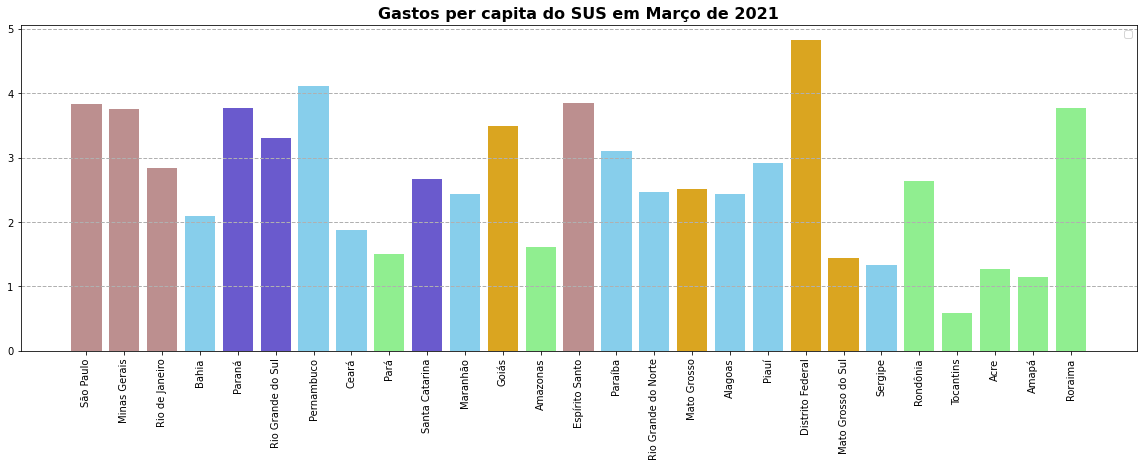

In [163]:
lista_cores = []
for estado in gasto_e_pop.index.tolist():
  indice = dados_usaveis.index.get_loc(estado)
  regiao = dados_usaveis['Região'][indice]
  if regiao == 'Norte':
    lista_cores.append('lightgreen')
  elif regiao == 'Nordeste':
    lista_cores.append('skyblue')
  elif regiao == 'Sudeste':
    lista_cores.append('rosybrown')
  elif regiao == 'Sul':
    lista_cores.append('slateblue')
  else:
    lista_cores.append('goldenrod')



fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(1, 1, 1)
bars = gasto_e_pop.index
x_pos = np.arange(len(bars))
plt.bar(x = x_pos, height= gasto_e_pop['Gasto per capita'], color = lista_cores)
plt.xticks(x_pos, bars, rotation = 90)
plt.title('Gastos per capita do SUS em Março de 2021', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.grid(axis='y', linestyle = '--', linewidth = 1)
plt.legend(list(set(lista_cores)), ['Norte', 'Nordeste','Sudeste','Sul','Centro-Oeste'])
plt.show()

Como faremos outros gráficos similares, podemos criar uma função para automatizar o processo:

In [106]:
def plotar_grafico_barras(dados_valores, dados_regioes, titulo, variavel):
  valores = dados_valores.copy()
  dados_gerais = dados_regioes.copy()


  lista_cores = []
  for estado in valores.index.tolist():
    indice = dados_gerais.index.get_loc(estado)
    regiao = dados_gerais['Região'][indice]
    if regiao == 'Norte':
     lista_cores.append('lightgreen')
    elif regiao == 'Nordeste':
      lista_cores.append('skyblue')
    elif regiao == 'Sudeste':
      lista_cores.append('rosybrown')
    elif regiao == 'Sul':
      lista_cores.append('slateblue')
    else:
      lista_cores.append('goldenrod')



  fig = plt.figure(figsize = (20,6))
  ax = fig.add_subplot(1, 1, 1)
  bars = valores.index
  x_pos = np.arange(len(bars))
  plt.bar(x = x_pos, height= valores[variavel], color = lista_cores)
  plt.xticks(x_pos, bars, rotation = 90)
  plt.ylabel(variavel)
  plt.title(titulo, fontdict={'fontsize': 16, 'fontweight':'bold'})
  plt.grid(axis='y', linestyle = '--', linewidth = 1)
  plt.show()

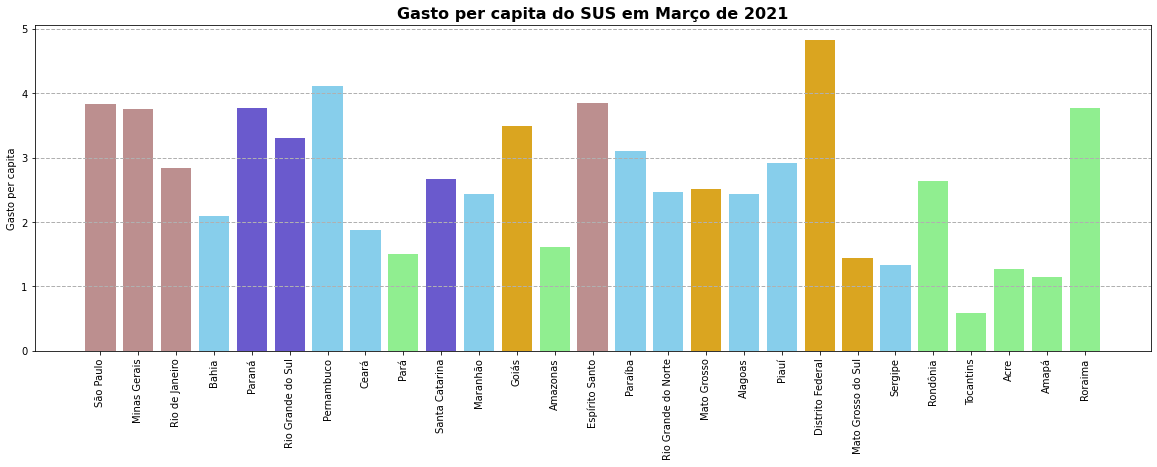

In [109]:
plotar_grafico_barras(gasto_e_pop,dados_usaveis,'Gasto per capita do SUS em Março de 2021','Gasto per capita')

Podemos ordenar o gráfico por habitantes (da menor população para a maior).

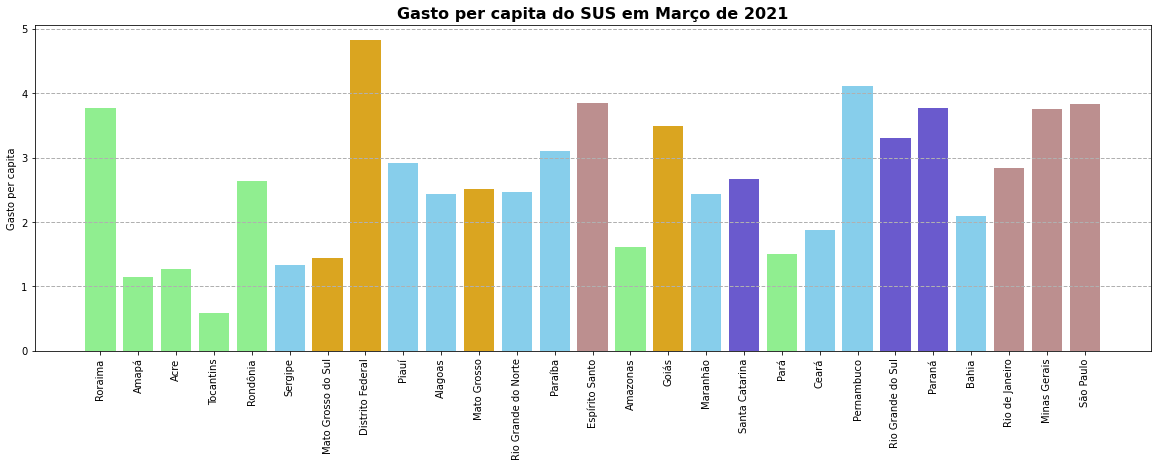

In [110]:
plotar_grafico_barras(gasto_e_pop.sort_values(by = 'populacao'),dados_usaveis,'Gasto per capita do SUS em Março de 2021','Gasto per capita')

Ou ordenar pelo gasto per capita:

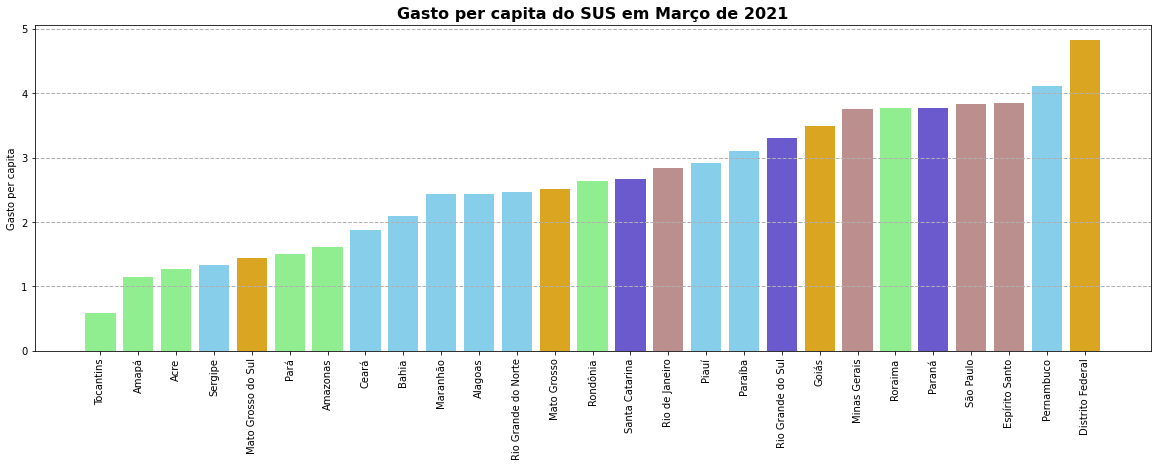

In [111]:
plotar_grafico_barras(gasto_e_pop.sort_values(by = 'Gasto per capita'),dados_usaveis,'Gasto per capita do SUS em Março de 2021','Gasto per capita')

A função é flexível ao ponto de podermos escolher a coluna que queremos plotar:

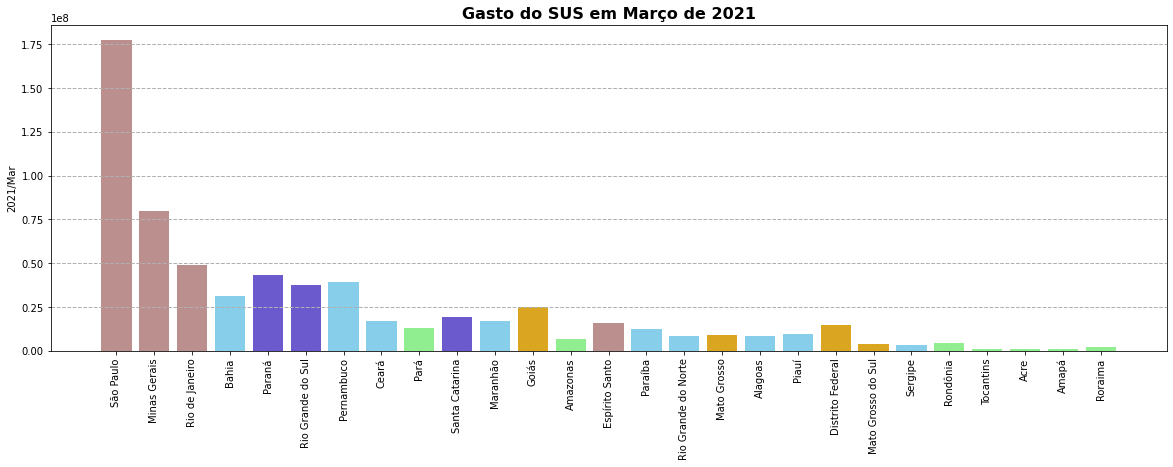

In [112]:
plotar_grafico_barras(gasto_e_pop,dados_usaveis,'Gasto do SUS em Março de 2021','2021/Mar')

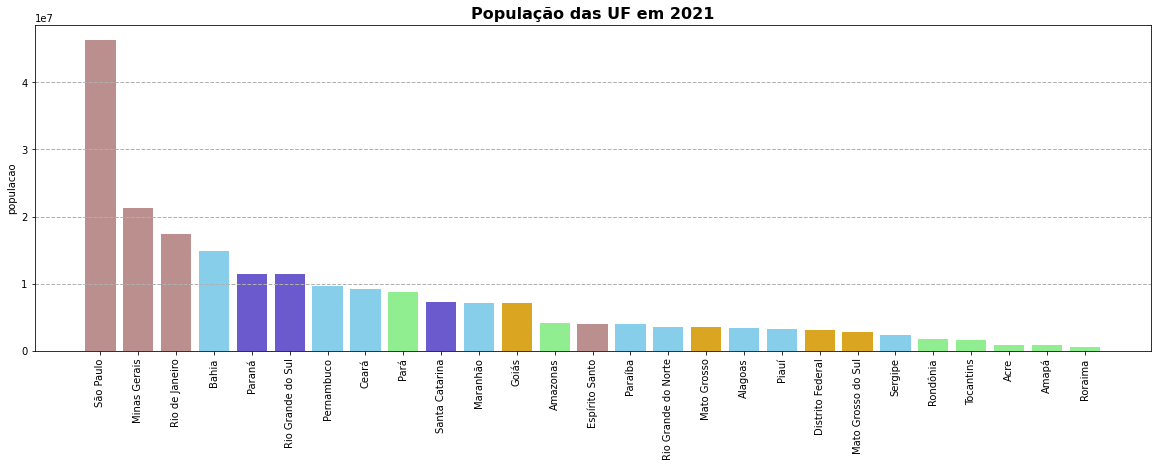

In [113]:
plotar_grafico_barras(gasto_e_pop,dados_usaveis,'População das UF em 2021','populacao')

## Gráficos com Seaborn

Podemos usar também a biblioteca Seaborn para plotar um gráfico de dispersão da população pelo gasto absoluto.

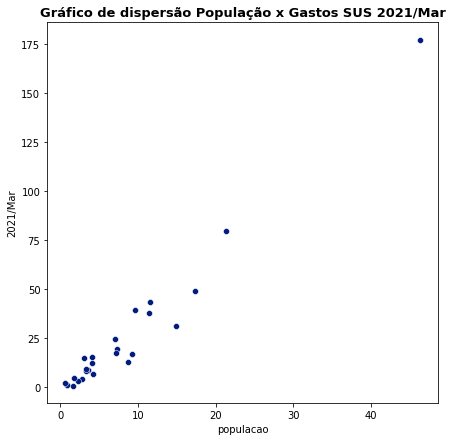

In [119]:
plt.figure(figsize=(7,7))
sns.scatterplot(data= gasto_e_pop/1000000, x='populacao', y = '2021/Mar')
plt.title('Gráfico de dispersão População x Gastos SUS 2021/Mar', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.show()

Observamos que os dados parecem seguir uma linha de tendência. Se quisermos, podemos plotar essa linha junto com o gráfico de dispersão:

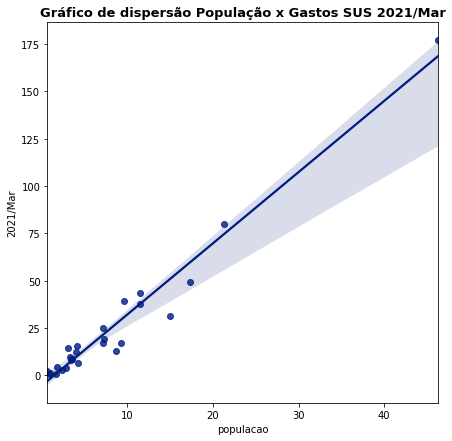

In [123]:
plt.figure(figsize=(7,7))
sns.regplot(data= gasto_e_pop/1000000, x='populacao', y = '2021/Mar')
plt.title('Gráfico de dispersão População x Gastos SUS 2021/Mar', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.show()

Vejamos agora o gráfico de dispersão da população pelo gasto per capita

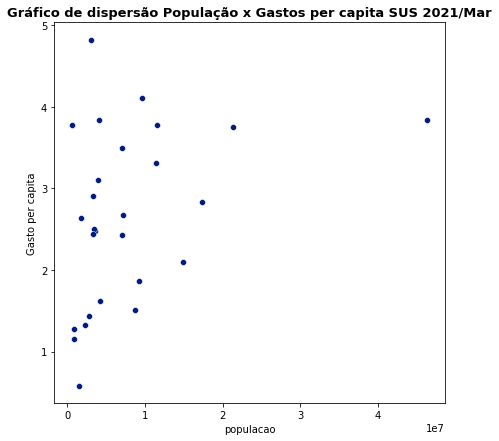

In [121]:
plt.figure(figsize=(7,7))
sns.scatterplot(data= gasto_e_pop, x='populacao', y = 'Gasto per capita')
plt.title('Gráfico de dispersão População x Gastos per capita SUS 2021/Mar', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.show()

Agora observamos que não parece haver uma tendência muito clara. Vejamos como seria a melhor linha de tendência:

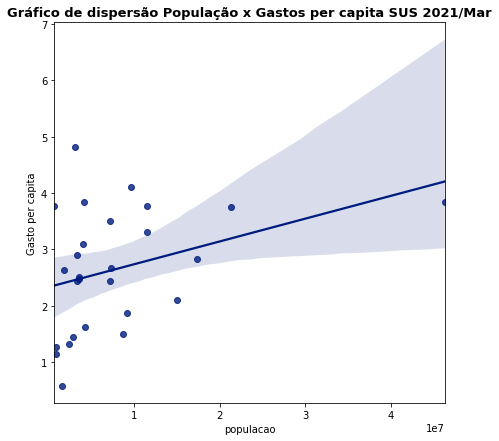

In [125]:
plt.figure(figsize=(7,7))
sns.regplot(data= gasto_e_pop, x='populacao', y = 'Gasto per capita')
plt.title('Gráfico de dispersão População x Gastos per capita SUS 2021/Mar', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.show()

## Gráficos do penultimo mês

Vajamos agora os mesmos gráficos, mas para o penultimo mês:

In [126]:
dados_penultimo = pd.DataFrame(dados_usaveis.iloc[:,-3])

In [127]:
dados_penultimo

,2021/Fev
Unidade da Federação,
Rondônia,"6,039,419.59"
Acre,"2,272,733.90"
Amazonas,"13,679,358.06"
Roraima,"3,044,798.77"
Pará,"23,343,222.94"
Amapá,"1,534,733.18"
Tocantins,"416,534.32"
Maranhão,"23,260,245.95"
Piauí,"13,636,005.36"


Agora vamos fazer o join com a população

In [128]:
gasto_e_pop2 =  pop_wiki.join(dados_penultimo)

In [129]:
gasto_e_pop2['Gasto per capita'] = gasto_e_pop2['2021/Fev']/gasto_e_pop2['populacao']

Agora podemos chamar a função que criamos acima para plotar o gráfico dos gastos per capita:

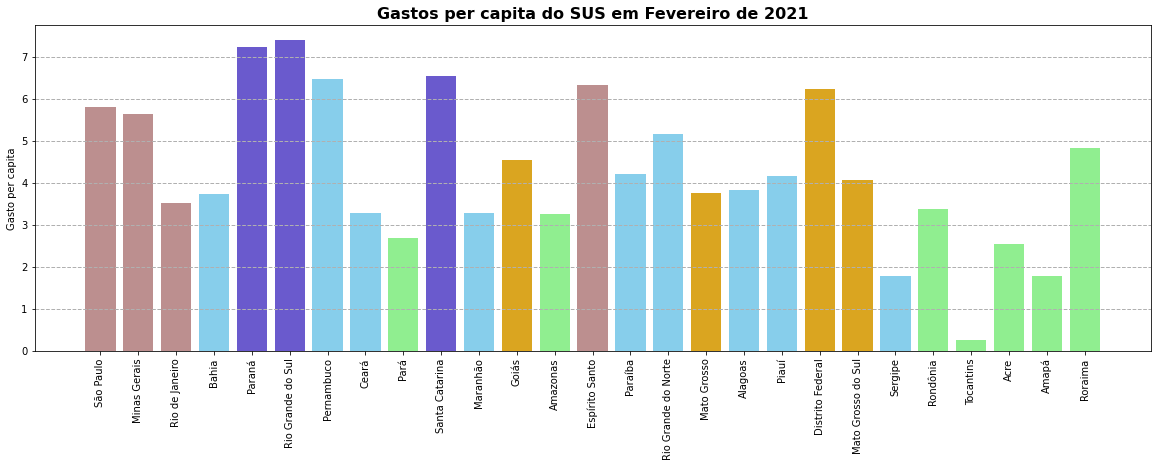

In [130]:
plotar_grafico_barras(gasto_e_pop2,dados_usaveis,'Gastos per capita do SUS em Fevereiro de 2021', 'Gasto per capita')

Ou plotar o gráfico dos gastos em valores absolutos:

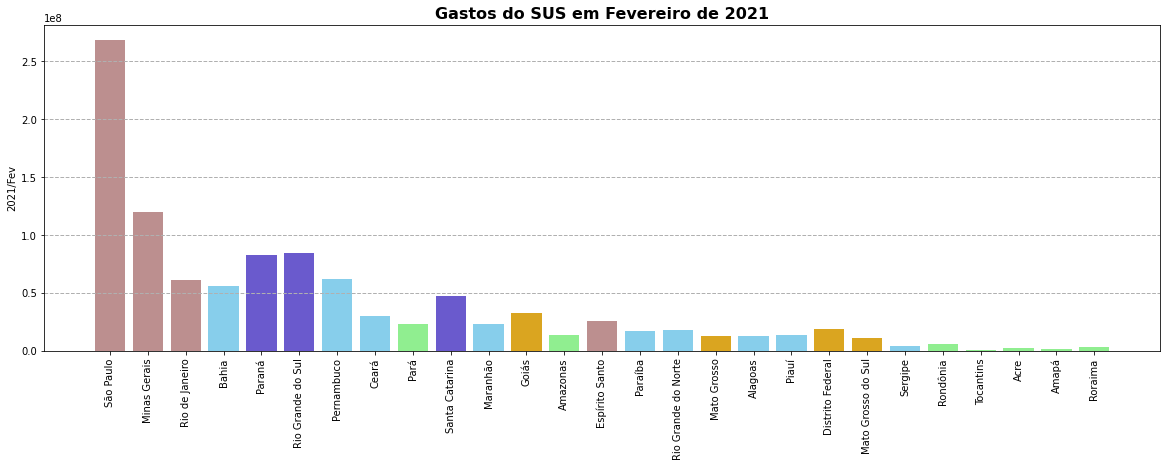

In [134]:
plotar_grafico_barras(gasto_e_pop2,dados_usaveis,'Gastos do SUS em Fevereiro de 2021', '2021/Fev')

Podemos plotar os gráficos dos meses de Fevereiro e Março juntos:

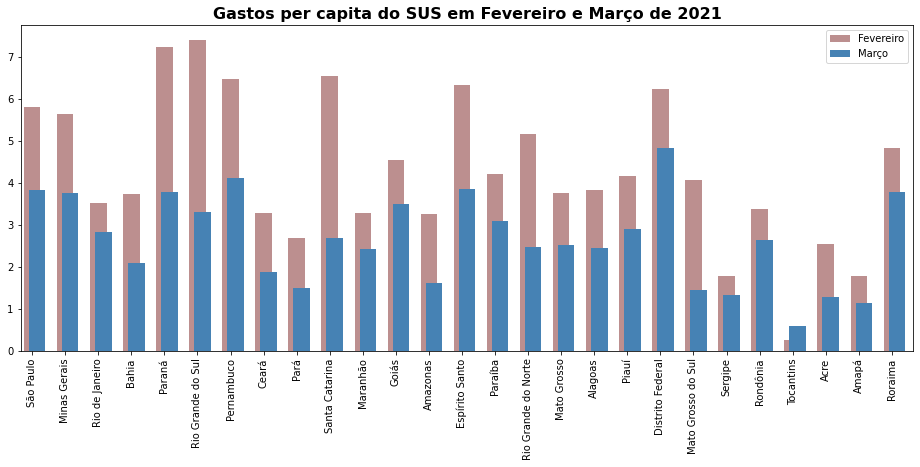

In [159]:
plt.figure(figsize=(20,8))
gasto_e_pop2['Gasto per capita'].plot(kind = 'bar', color = 'rosybrown', figsize = (16,6), position = 0.5)
gasto_e_pop['Gasto per capita'].plot(kind = 'bar', color = 'steelblue', figsize = (16,6), position = 0.2)
plt.title('Gastos per capita do SUS em Fevereiro e Março de 2021', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.legend(['Fevereiro', 'Março'])
plt.show()

Notamos que para a maioria dos estados, os valores de Março são menores que os de Fevereiro. É natural, pois provavelmente a porcentagem dos dados de Março que já foram processados é menor que a porcentagem dos dados de Fevereiro que já foram processados.

Vejamos agora o gráfico de dispersão:

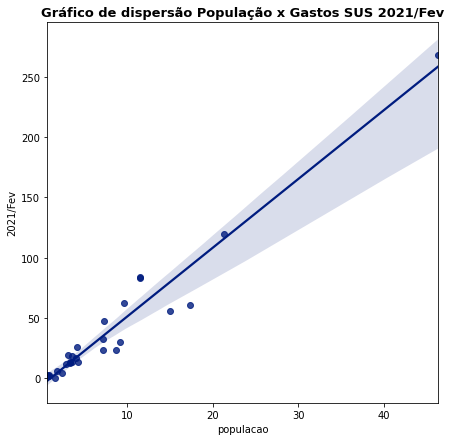

In [166]:
plt.figure(figsize=(7,7))
sns.regplot(data= gasto_e_pop2/1000000, x='populacao', y = '2021/Fev')
plt.title('Gráfico de dispersão População x Gastos SUS 2021/Fev', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.show()

Podemos plotar os dois gráficos juntos:

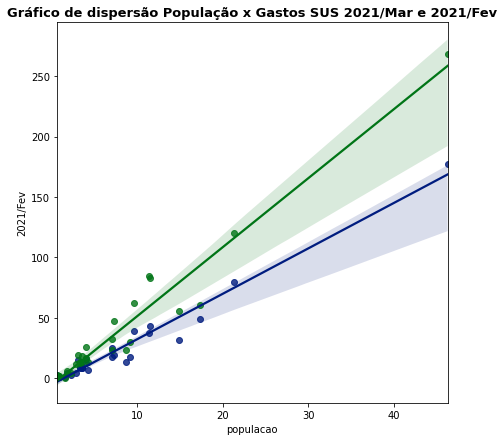

In [171]:
plt.figure(figsize=(7,7))
sns.regplot(data= gasto_e_pop/1000000, x='populacao', y = '2021/Mar')
sns.regplot(data= gasto_e_pop2/1000000, x='populacao', y = '2021/Fev')
plt.title('Gráfico de dispersão População x Gastos SUS 2021/Mar e 2021/Fev', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.show()